<a href="https://colab.research.google.com/github/anasua2905/313/blob/main/cardiovascular_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df

,Age,Sex,ChestPain_Type,Blood_Pressure,Cholesterol,Blood_glucose,Resting_ECG,Max_Heart_Rate,Exercise_Angina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
641,46,F,ASY,138,243,0,LVH,152,Y,0.0,Flat,0
642,51,F,NAP,120,295,0,LVH,157,N,0.6,Up,0
643,58,M,NAP,112,230,0,LVH,165,N,2.5,Flat,1
644,71,F,NAP,110,265,1,LVH,130,N,0.0,Up,0


In [ ]:
df.isnull()

,Age,Sex,ChestPain_Type,Blood_Pressure,Cholesterol,Blood_glucose,Resting_ECG,Max_Heart_Rate,Exercise_Angina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
641,False,False,False,False,False,False,False,False,False,False,False,False
642,False,False,False,False,False,False,False,False,False,False,False,False
643,False,False,False,False,False,False,False,False,False,False,False,False
644,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              646 non-null    int64  
 1   Sex              646 non-null    object 
 2   ChestPain_Type   646 non-null    object 
 3   Blood_Pressure   646 non-null    int64  
 4   Cholesterol      646 non-null    int64  
 5   Blood_glucose    646 non-null    int64  
 6   Resting_ECG      646 non-null    object 
 7   Max_Heart_Rate   646 non-null    int64  
 8   Exercise_Angina  646 non-null    object 
 9   Oldpeak          646 non-null    float64
 10  ST_Slope         646 non-null    object 
 11  HeartDisease     646 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 60.7+ KB


In [ ]:
df.describe()


,Age,Blood_Pressure,Cholesterol,Blood_glucose,Max_Heart_Rate,Oldpeak,HeartDisease
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,53.252322,132.465944,179.430341,0.267802,131.280186,0.823994,0.589783
std,9.608610,18.697127,121.487284,0.443157,24.378167,1.014131,0.492254
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,0.000000,115.000000,0.000000,0.000000
50%,54.000000,130.000000,214.000000,0.000000,130.000000,0.450000,1.000000
75%,60.000000,140.000000,263.000000,1.000000,150.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,190.000000,5.000000,1.000000


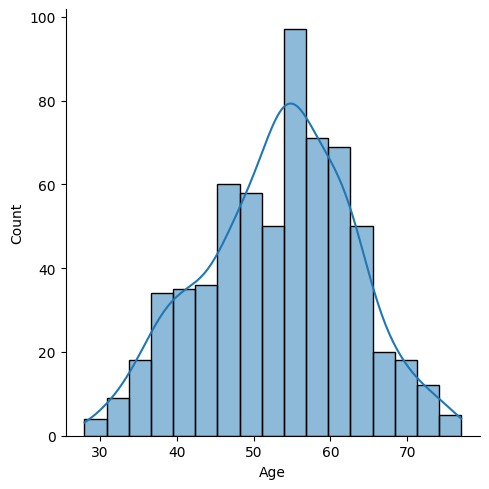

In [ ]:
sns.displot(x = 'Age',data = df,kde = 'True')

<Axes: >

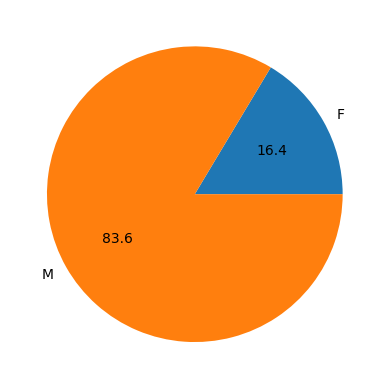

In [ ]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

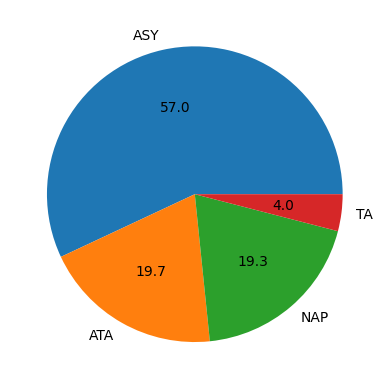

In [ ]:
df.groupby('ChestPain_Type').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

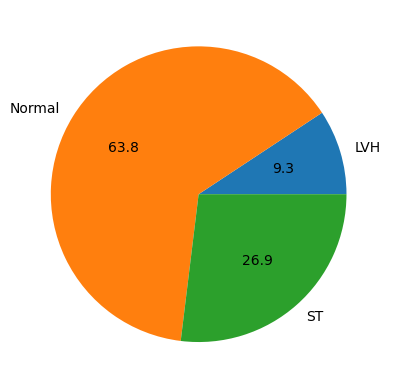

In [ ]:
df.groupby('Resting_ECG').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

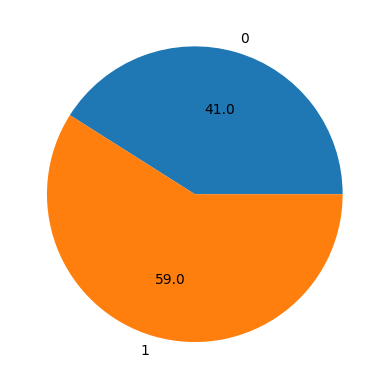

In [ ]:
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: xlabel='Age'>

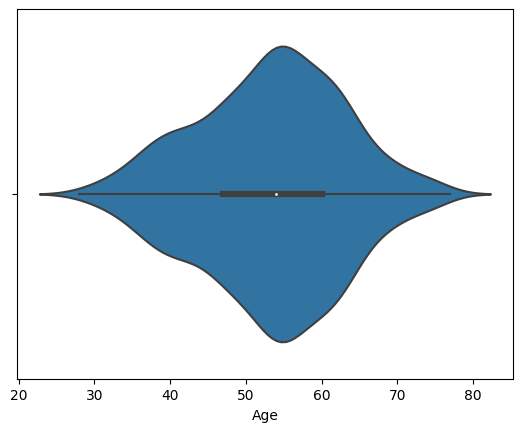

In [ ]:
sns.violinplot(x = df['Age'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

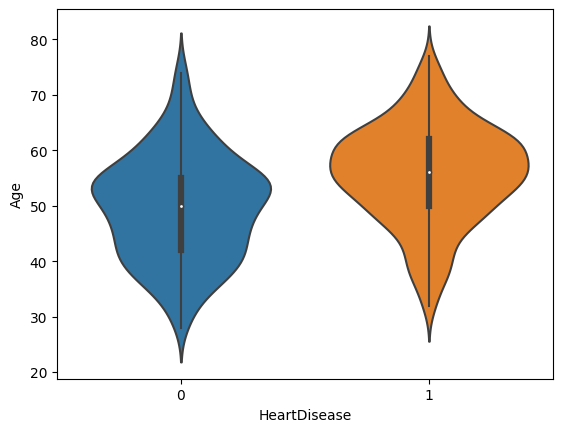

In [ ]:
sns.violinplot(y = df['Age'], x = df['HeartDisease'])

In [ ]:
sns.violinplot(x = df['Sex'])

TypeError: ignored

<Axes: xlabel='HeartDisease', ylabel='Sex'>

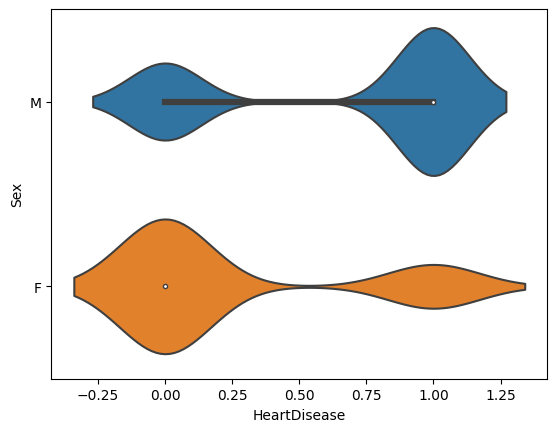

In [ ]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

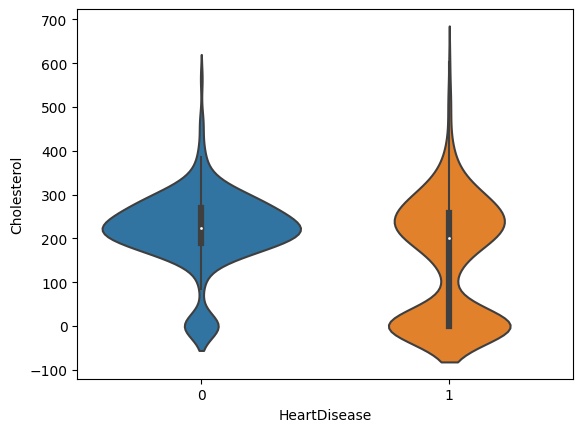

In [ ]:
sns.violinplot(y = df['Cholesterol'], x = df['HeartDisease'])

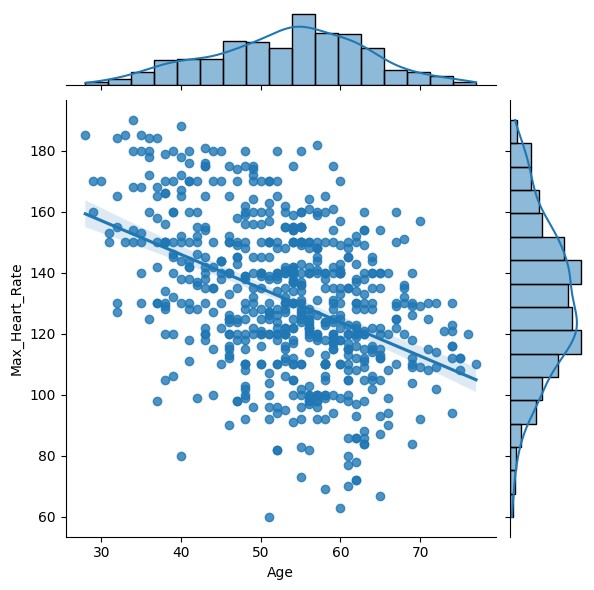

In [ ]:
sns.jointplot(x = 'Age',y = 'Max_Heart_Rate',data = df,kind = 'reg')

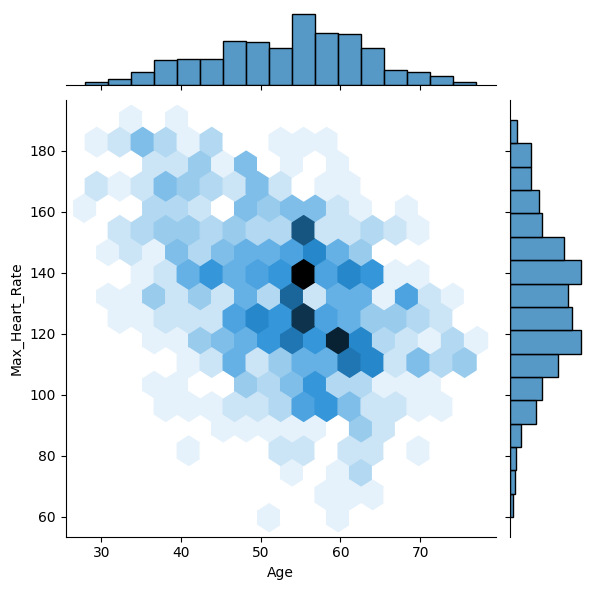

In [ ]:
sns.jointplot(x = 'Age',y = 'Max_Heart_Rate',data = df,kind = 'hex')

<ipython-input-20-9c41d88ab99c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

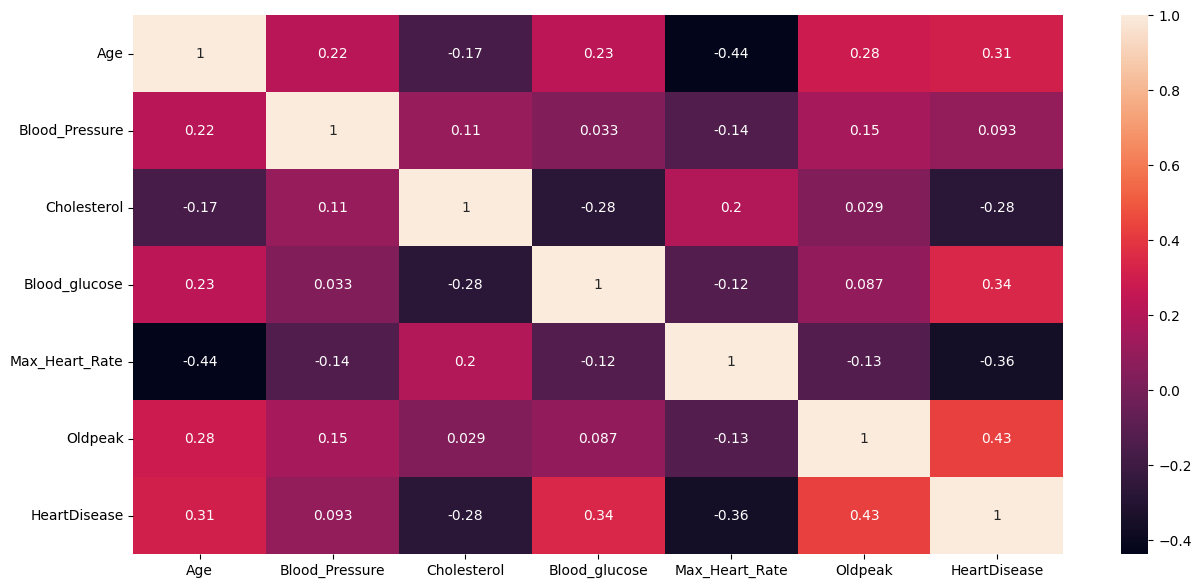

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

<ipython-input-21-404311e908b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


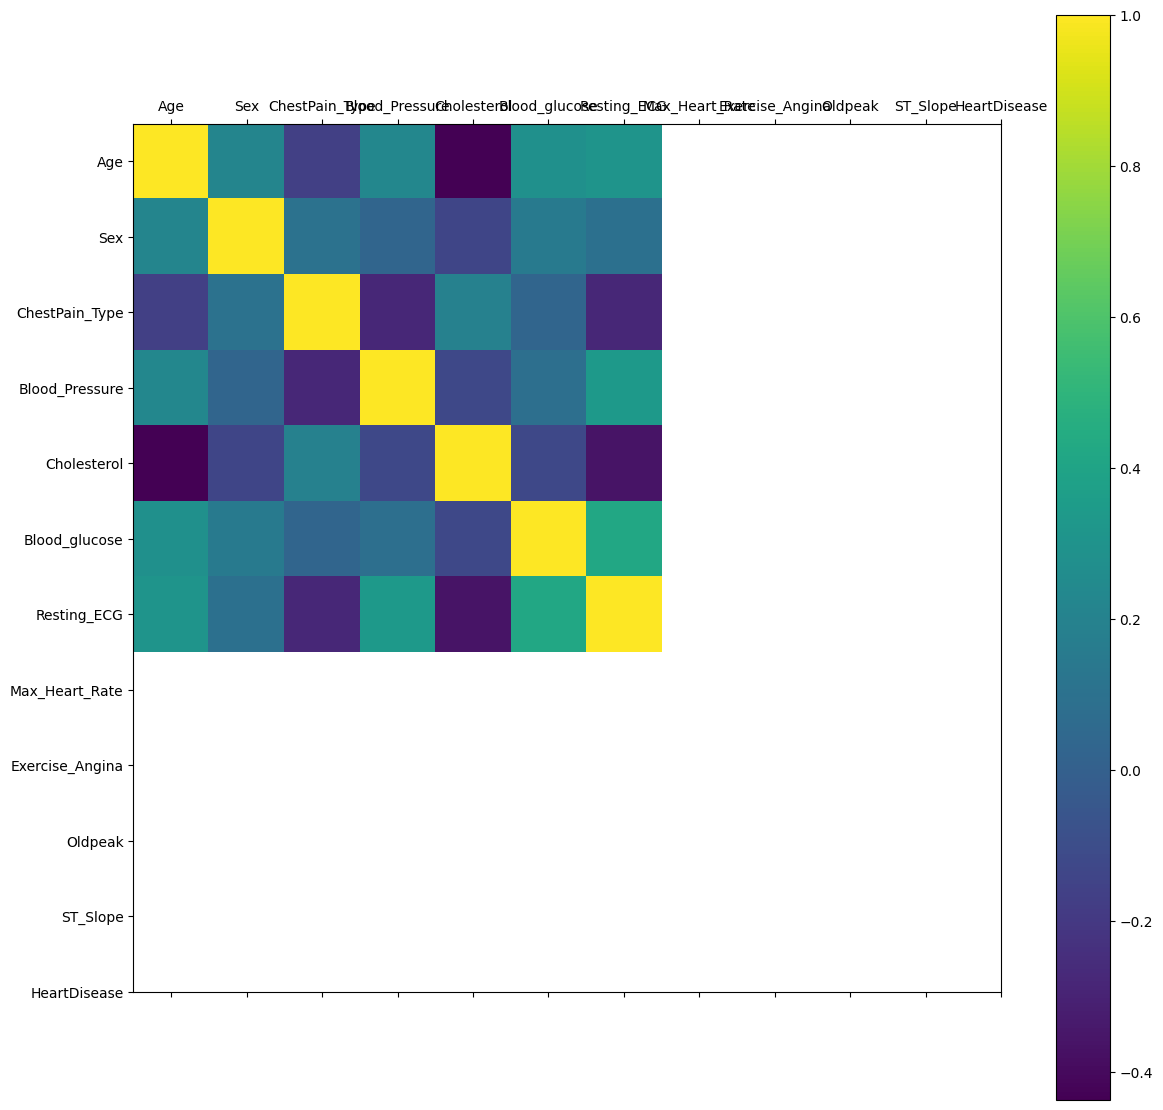

In [ ]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Blood_Pressure'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'Blood_glucose'}>,
        <Axes: title={'center': 'Max_Heart_Rate'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

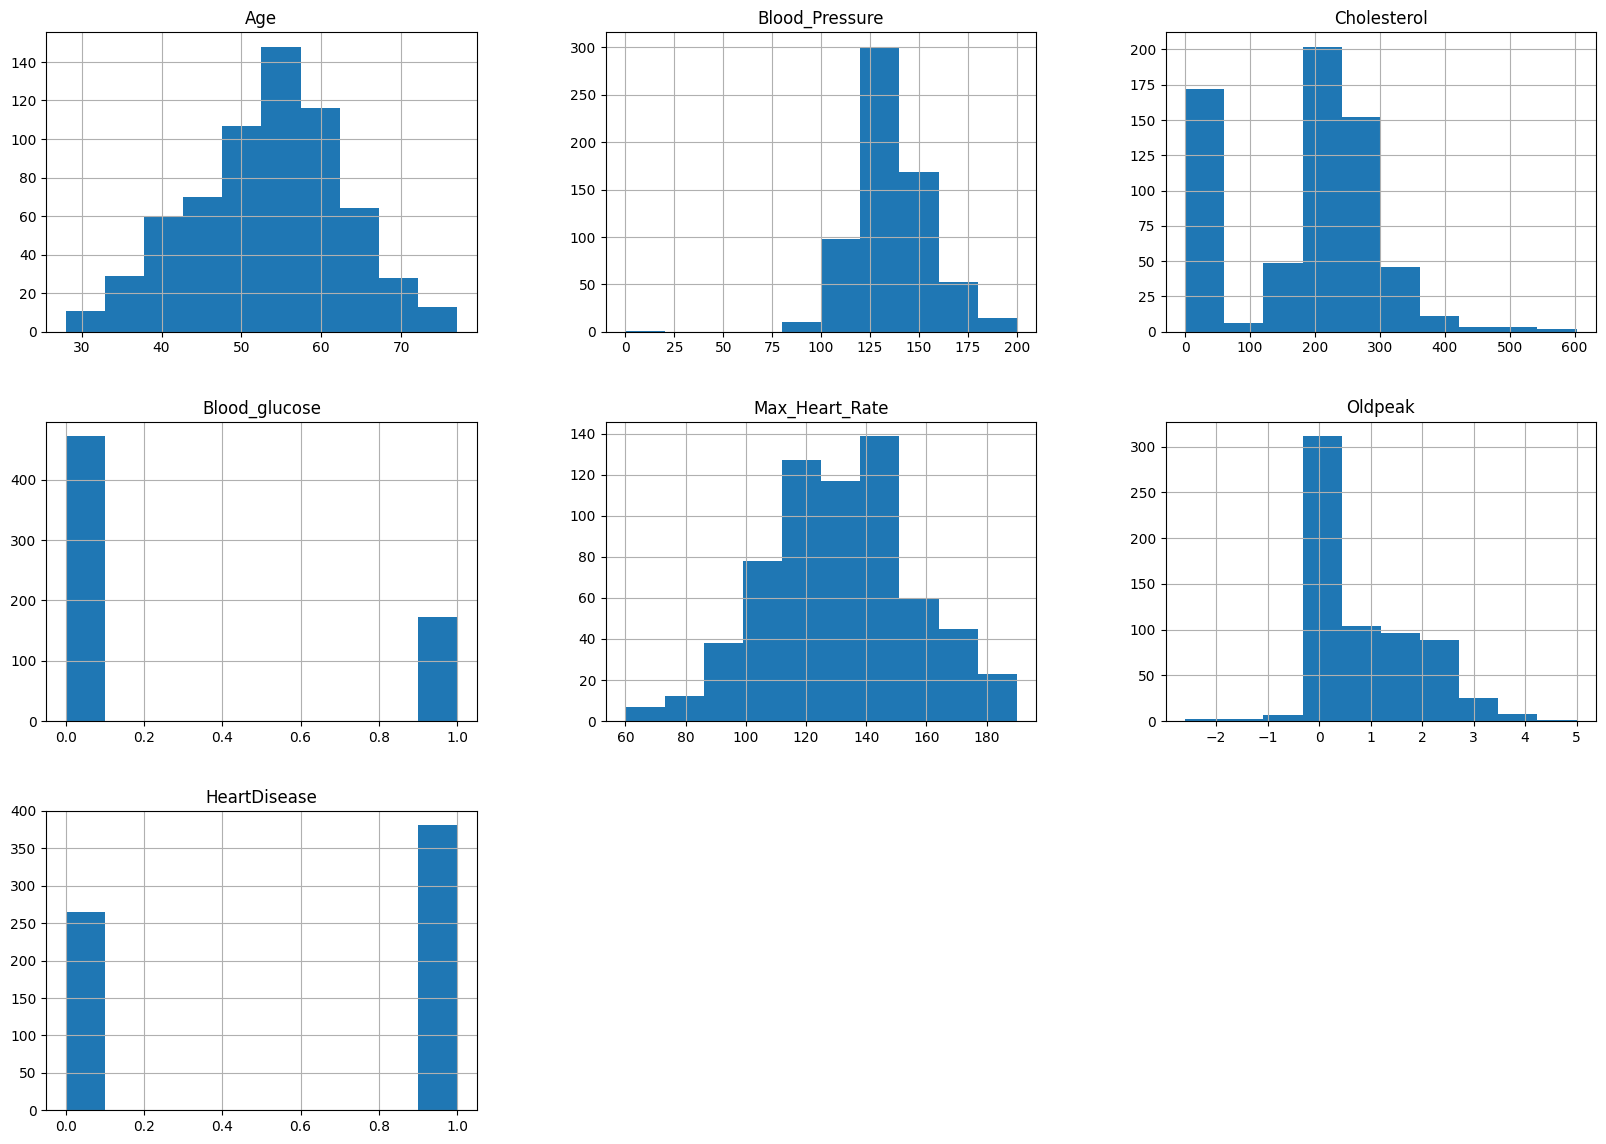

In [ ]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

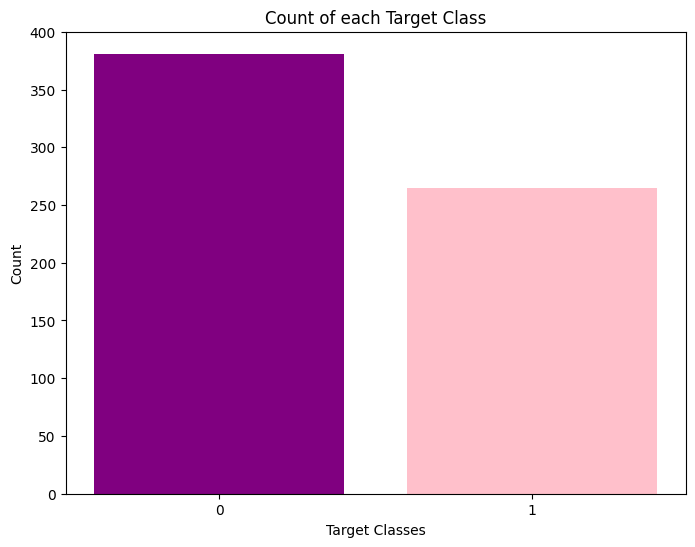

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['HeartDisease'].unique(), df['HeartDisease'].value_counts(), color = ['purple', 'pink'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

[]

<Figure size 1500x1000 with 0 Axes>

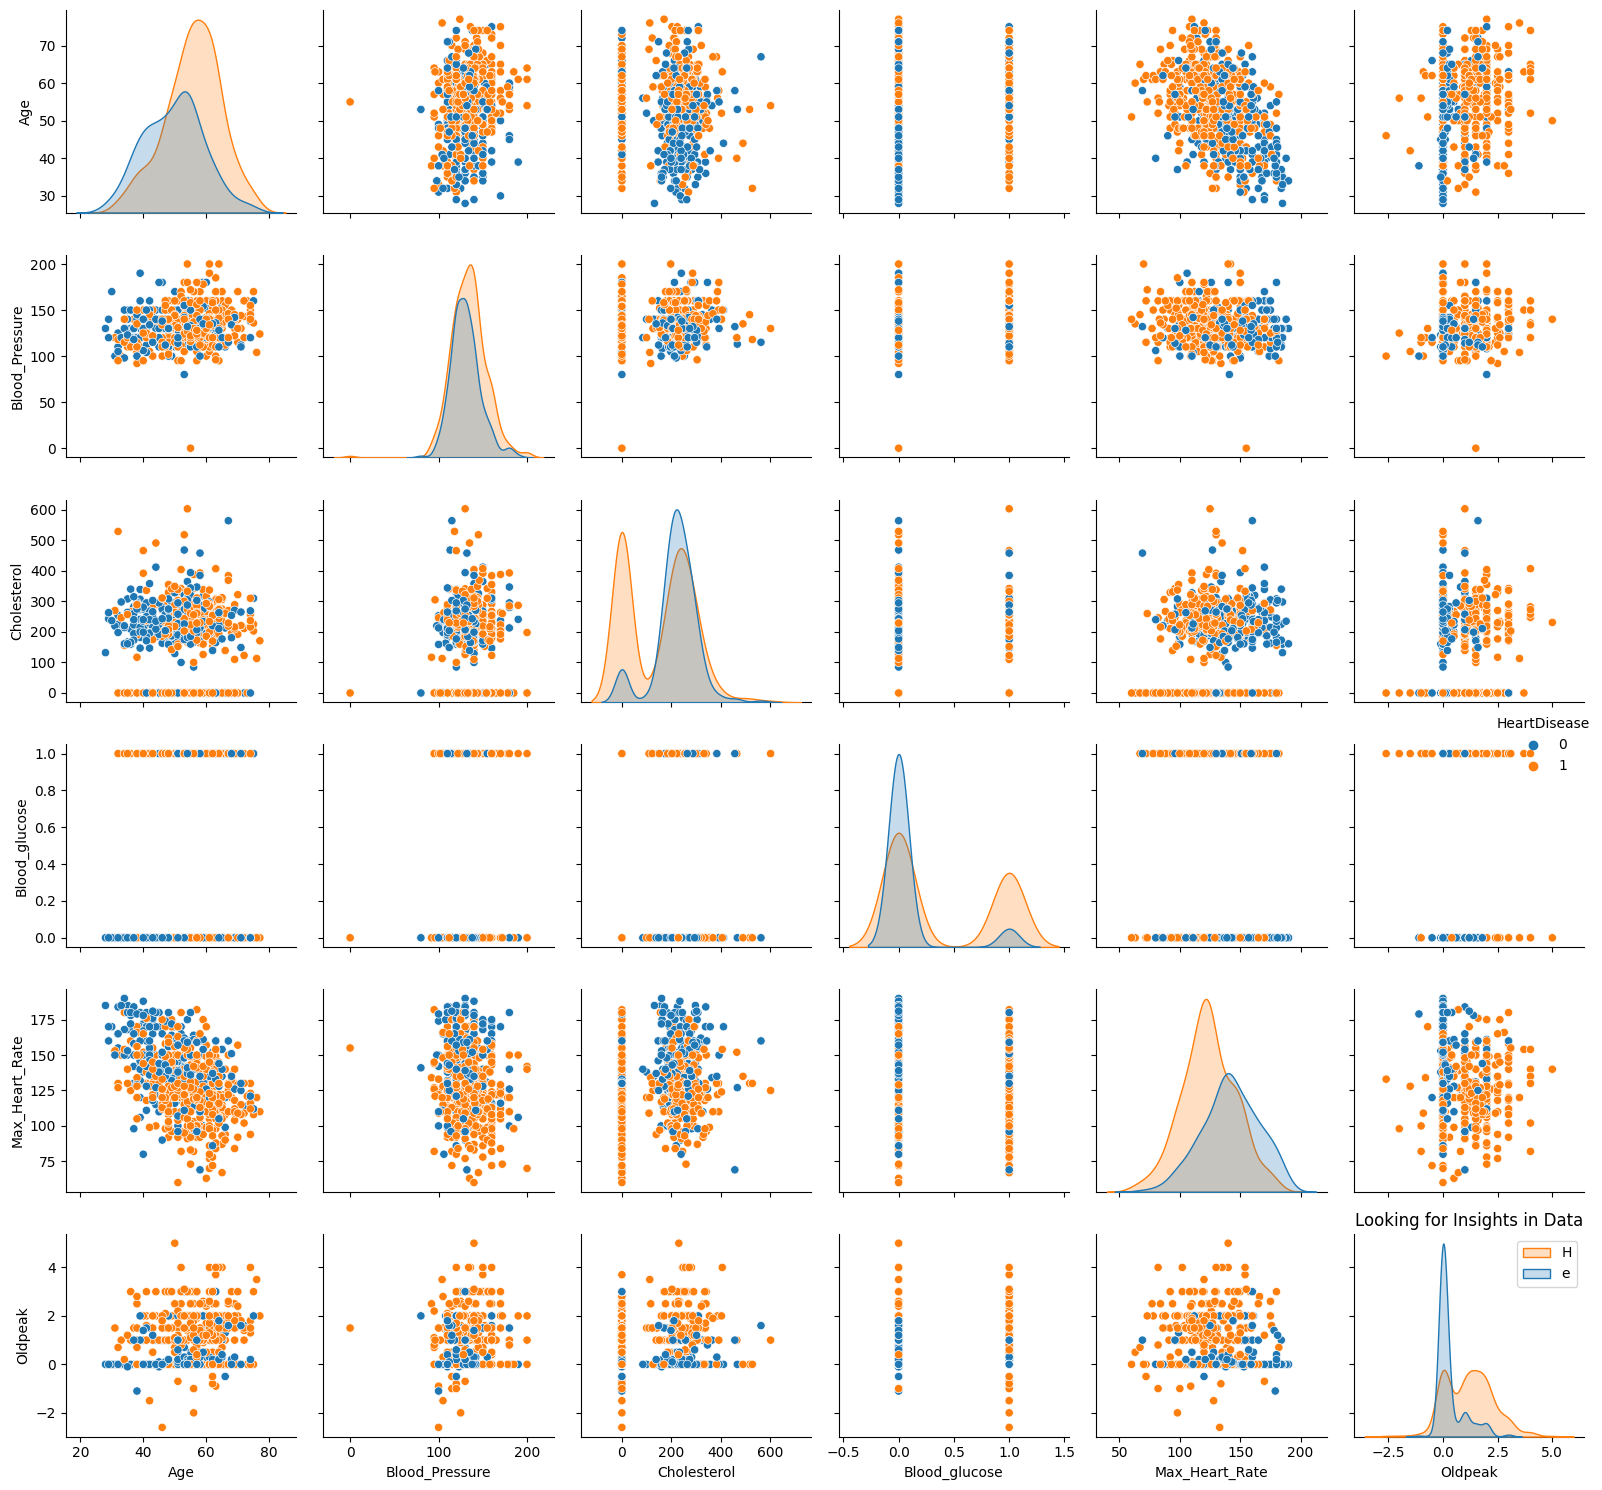

In [ ]:
# We can view the relationships by plotting multiple pairwise bivariate distributions in a dataset.
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insights in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

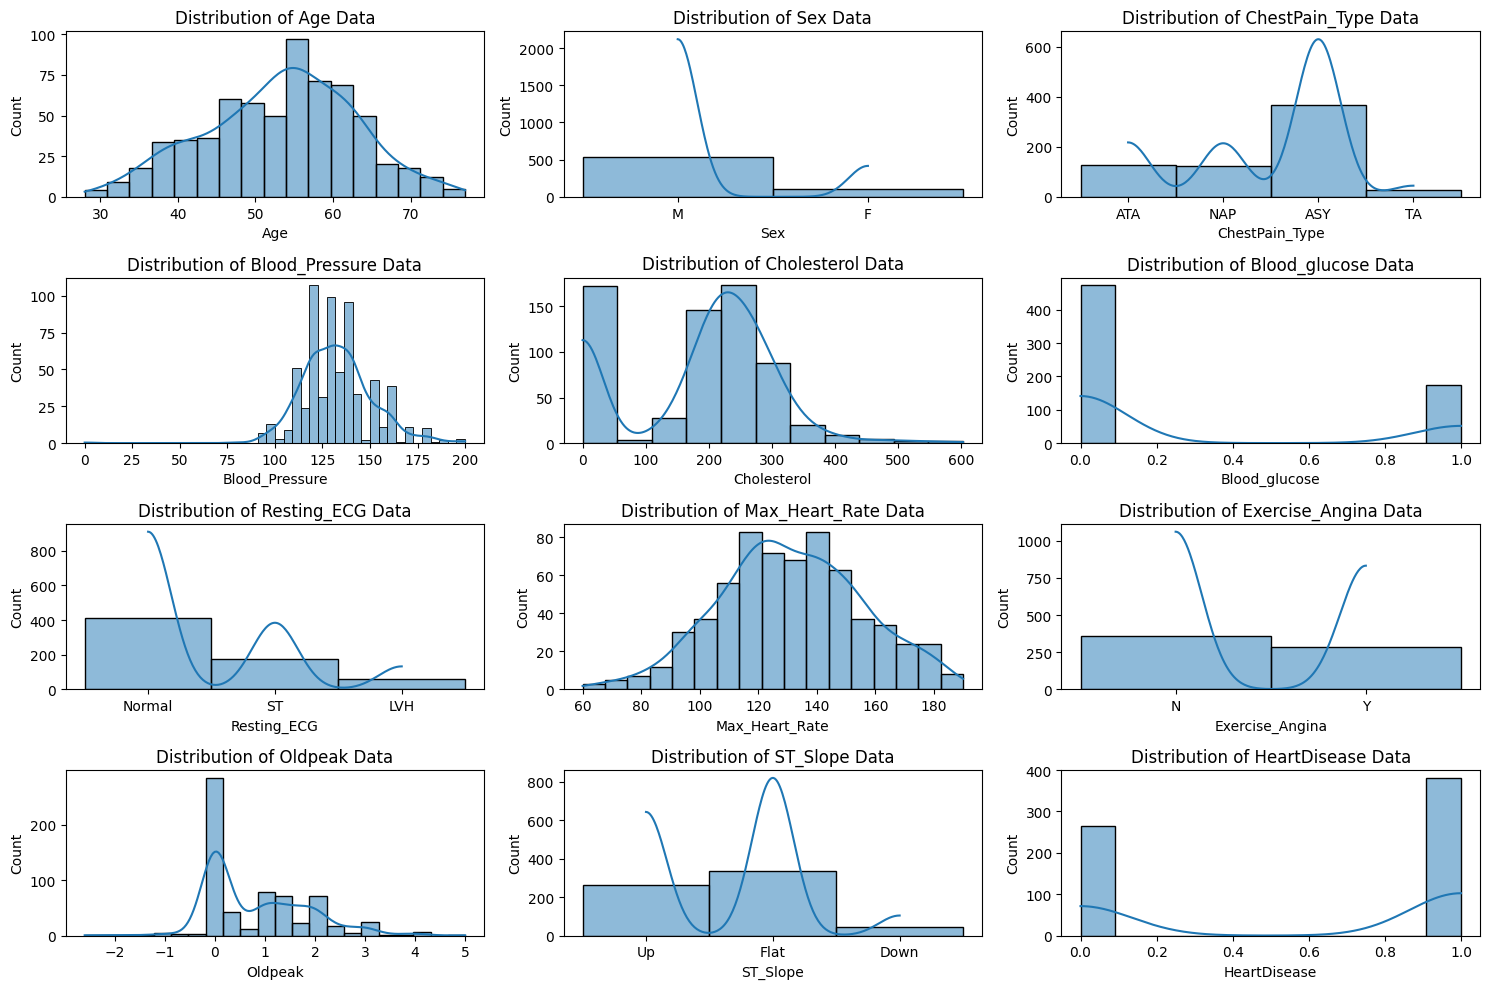

In [ ]:
# Then we can check the linearity of the variables by plotting the distribution graph and looking for skewness of features.
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
df.columns = [ 'Age','Sex','ChestPain_Type','Blood_Pressure','Cholesterol','Blood_glucose ',' Resting_ECG','Max_Heart_Rate','Exercise_Angina',' Oldpeak', 'ST_Slope ','HeartDisease']

In [ ]:
df["Exercise_Angina"] = df["Exercise_Angina"].replace({"N": 0, "Y": 1})
df[' Resting_ECG']=df[' Resting_ECG'].replace({"Normal":1,"ST":2,"LVH":3})
df['ST_Slope ']=df['ST_Slope '].replace({"Up":1,"Flat":2,"Down":3})
df['ChestPain_Type']=df['ChestPain_Type'].replace({"ASY":1,"TA":2,"NAP":3,"ATA":4})
df['Sex']=df['Sex'].replace({"M": 0,"F": 1})


In [ ]:
# Count the number of cases with and without heart disease
heart_disease_counts = df["HeartDisease"].value_counts()

# Create a bar chart to show the distribution of heart disease cases
fig = go.Figure(data=[go.Bar(x=["Normal", "Heart Disease"], y=heart_disease_counts.values)])

# Add labels to the x and y axes
fig.update_layout(xaxis_title="Heart Disease", yaxis_title="Count",
                  title="Distribution of cardiovascular Disease Cases")

# Show the plot
fig.show()

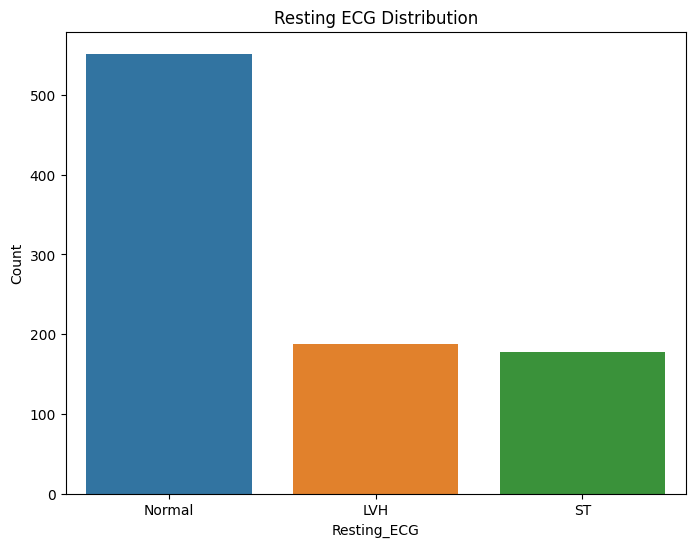

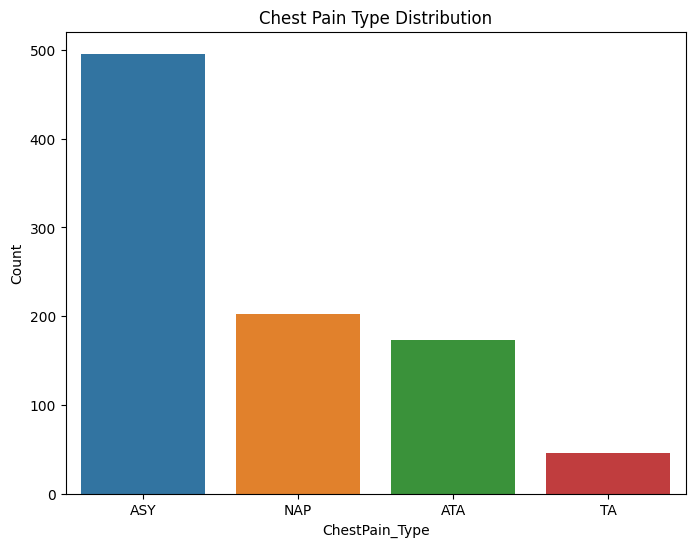

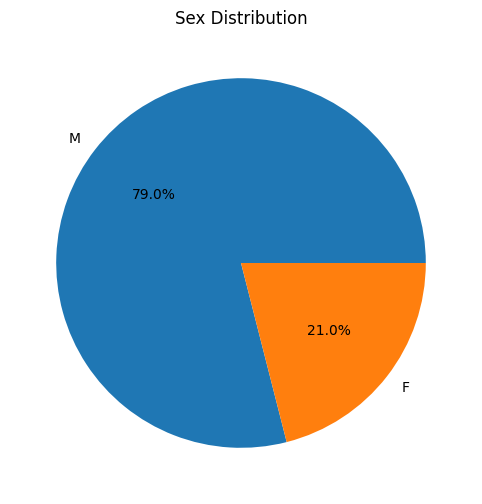

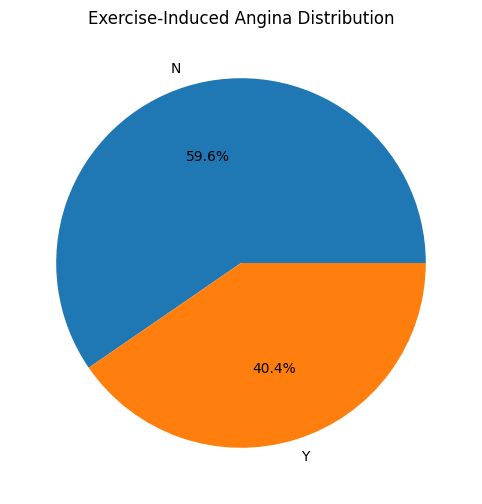

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

In [ ]:
# Resting_ECG
resting_ecg_counts = [552, 188, 178]
resting_ecg_labels = ['Normal', 'LVH', 'ST']

sns.barplot(x=resting_ecg_labels, y=resting_ecg_counts)
plt.xlabel('Resting_ECG')
plt.ylabel('Count')
plt.title('Resting ECG Distribution')
plt.show()

# ChestPain_Type
chest_pain_counts = [496, 203, 173, 46]
chest_pain_labels = ['ASY', 'NAP', 'ATA', 'TA']

sns.barplot(x=chest_pain_labels, y=chest_pain_counts)
plt.xlabel('ChestPain_Type')
plt.ylabel('Count')
plt.title('Chest Pain Type Distribution')
plt.show()
# Sex
sex_counts = [725, 193]
sex_labels = ['M', 'F']

plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

# Exercise_Angina
exercise_angina_counts = [547, 371]
exercise_angina_labels = ['N', 'Y']

plt.pie(exercise_angina_counts, labels=exercise_angina_labels, autopct='%1.1f%%')
plt.title('Exercise-Induced Angina Distribution')
plt.show()
# ST_Slope
st_slope_counts = [460, 395, 63]
st_slope_labels = ['Flat', 'Up', 'Down']

sns.barplot

In [ ]:
# Handling missing values (if any)
X = X.fillna(X.mean())

NameError: ignored

In [ ]:
y = df['HeartDisease']
X = df.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 301, 0: 215})

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[40 10]
 [ 5 75]]


Accuracy of Logistic Regression: 88.46153846153845 

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        50
           1       0.88      0.94      0.91        80

    accuracy                           0.88       130
   macro avg       0.89      0.87      0.88       130
weighted avg       0.88      0.88      0.88       130



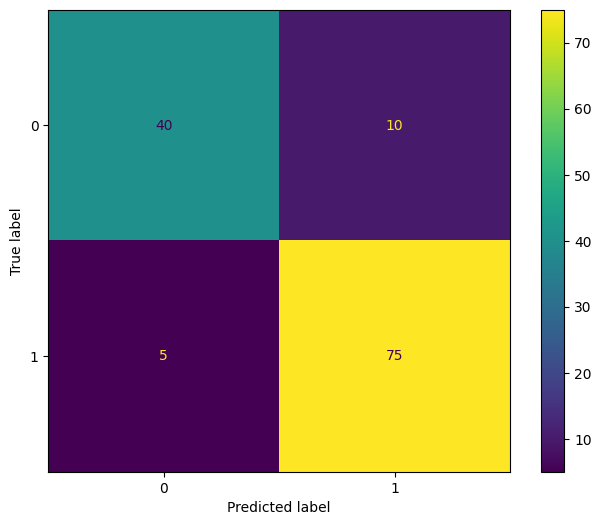

In [ ]:
cm = confusion_matrix(y_test,lr_predict )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[41  9]
 [ 3 77]]


Accuracy of Naive Bayes model: 90.76923076923077 

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        50
           1       0.90      0.96      0.93        80

    accuracy                           0.91       130
   macro avg       0.91      0.89      0.90       130
weighted avg       0.91      0.91      0.91       130



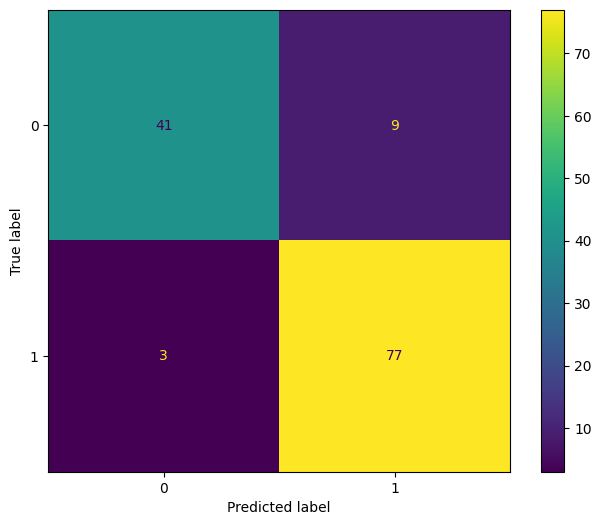

In [ ]:
cm = confusion_matrix(y_test,nbpred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[41  9]
 [ 1 79]]


Accuracy of Random Forest: 92.3076923076923 

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.90      0.99      0.94        80

    accuracy                           0.92       130
   macro avg       0.94      0.90      0.92       130
weighted avg       0.93      0.92      0.92       130



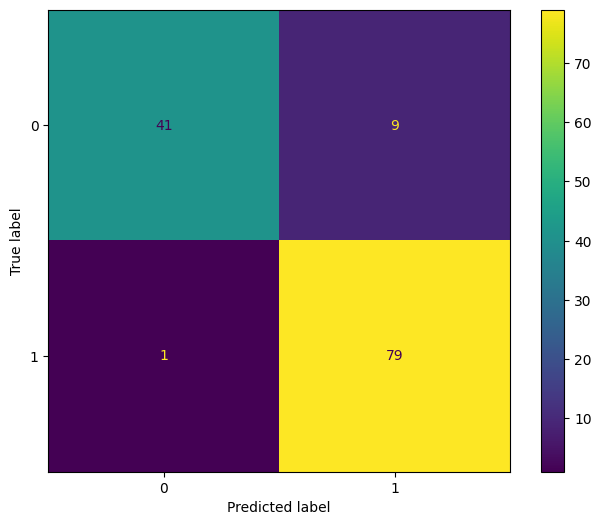

In [ ]:
cm = confusion_matrix(y_test, rf_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[41  9]
 [ 5 75]]


Accuracy of Extreme Gradient Boost: 89.23076923076924 

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.89      0.94      0.91        80

    accuracy                           0.89       130
   macro avg       0.89      0.88      0.88       130
weighted avg       0.89      0.89      0.89       130



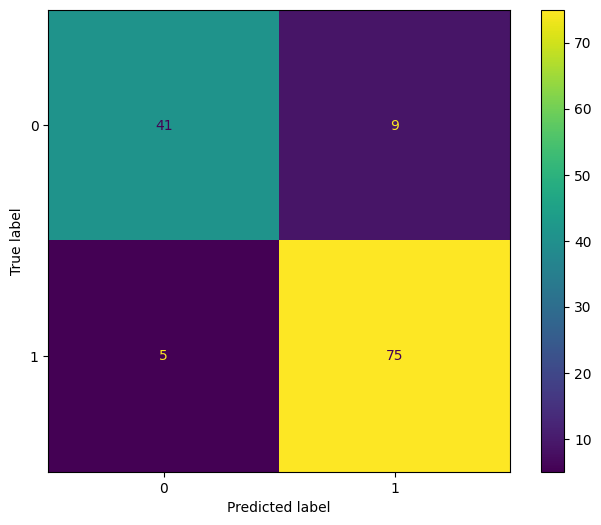

In [ ]:
cm = confusion_matrix(y_test, xgb_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[43  7]
 [ 4 76]]


Accuracy of K-NeighborsClassifier: 91.53846153846153 

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.92      0.95      0.93        80

    accuracy                           0.92       130
   macro avg       0.92      0.91      0.91       130
weighted avg       0.92      0.92      0.91       130



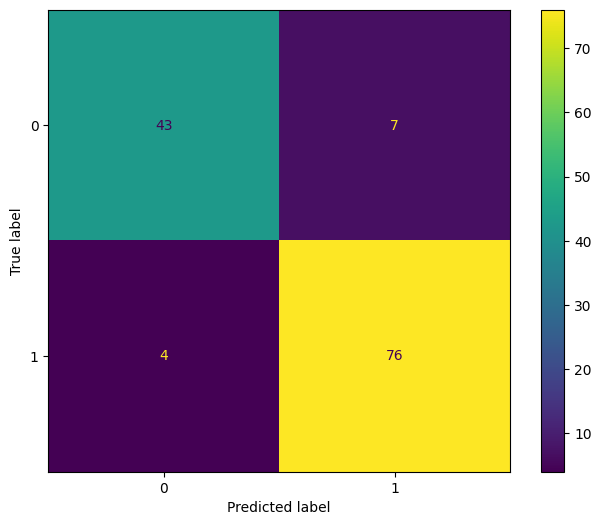

In [ ]:
cm = confusion_matrix(y_test, knn_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[43  7]
 [ 7 73]]


Accuracy of DecisionTreeClassifier: 89.23076923076924 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.91      0.91      0.91        80

    accuracy                           0.89       130
   macro avg       0.89      0.89      0.89       130
weighted avg       0.89      0.89      0.89       130



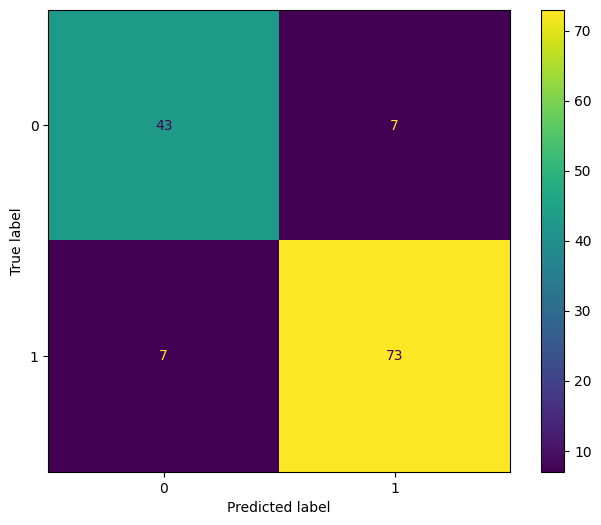

In [ ]:
cm = confusion_matrix(y_test, dt_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[40 10]
 [ 4 76]]


Accuracy of Support Vector Classifier: 89.23076923076924 

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        50
           1       0.88      0.95      0.92        80

    accuracy                           0.89       130
   macro avg       0.90      0.88      0.88       130
weighted avg       0.89      0.89      0.89       130



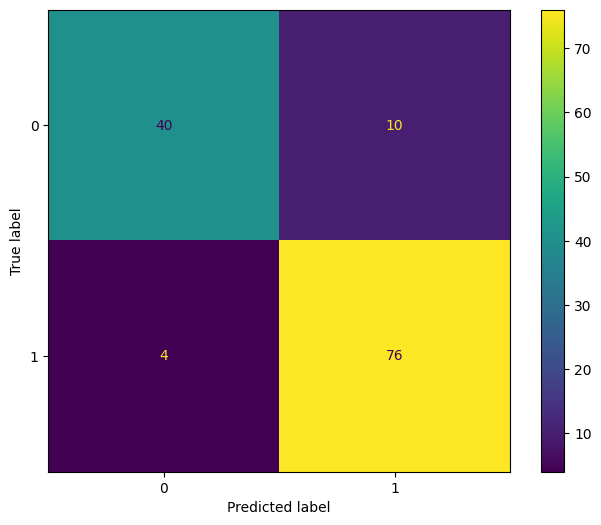

In [ ]:
cm = confusion_matrix(y_test, svc_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
m8 = 'Light GBMclassifier'
lgbm = LGBMClassifier(learning_rate=1)
lgbm.fit(X_train, y_train)
lgbm_predict = lgbm.predict(X_test)
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_predict)
lgbm_acc_score = accuracy_score(y_test, lgbm_predict)
print("confussion matrix")
print(lgbm_conf_matrix)
print("\n")
print("Accuracy of LGBMClassifier:",lgbm_acc_score*100,'\n')
print(classification_report(y_test,lgbm_predict))

confussion matrix
[[41  9]
 [ 4 76]]


Accuracy of LGBMClassifier: 90.0 

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.89      0.95      0.92        80

    accuracy                           0.90       130
   macro avg       0.90      0.89      0.89       130
weighted avg       0.90      0.90      0.90       130



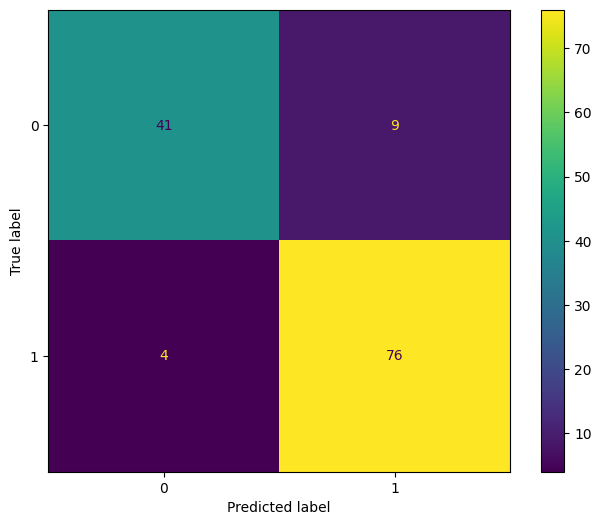

In [ ]:
cm = confusion_matrix(y_test, lgbm_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbor','Decision Tree','Support Vector Machine','Lignt GBMclassifier'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,lgbm_acc_score*100]})

In [ ]:
model_ev

,Model,Accuracy
0,Logistic Regression,88.461538
1,Naive Bayes,90.769231
2,Random Forest,92.307692
3,Extreme Gradient Boost,89.230769
4,K-Nearest Neighbor,91.538462
5,Decision Tree,89.230769
6,Support Vector Machine,89.230769
7,Lignt GBMclassifier,90.000000


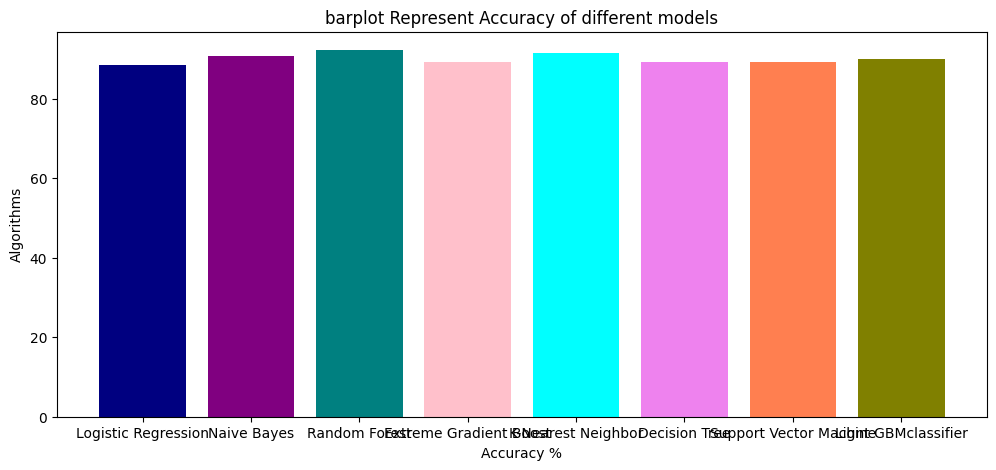

In [ ]:
colors = ['navy','purple','teal','pink','aqua','violet','coral', 'olive']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()